# NLP Final: The Facebook Campaign: Revealing Politcians’ Hidden Ads
# File 2: Creating Wordclouds
Fosnacht & Lerma 10/22/22

## Load dependencies and data

In [1]:
#for importing data and wrangling
import pandas as pd
import numpy as np

#for plotting images & adjusting colors
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image


In [2]:
df = pd.read_csv('fb_ads.csv')
df=df[df['normtext'].notna()]
df

,party,page_name,text,normtext
0,D,Patty Murray,https://www.usatoday.com/story/news/politics/2...,httpswww usatoday comstorynewspoliticstiffanys...
1,D,Patty Murray,I will ALWAYS defend a woman’s right to make h...,always defend woman right make health care dec...
2,D,Patty Murray,Efforts to undermine our fair and free electio...,effort undermine fair free election put democr...
3,D,Patty Murray,https://www.usatoday.com/story/news/politics/2...,httpswww usatoday comstorynewspoliticstiffanys...
4,D,Patty Murray,I will ALWAYS defend a woman’s right to make h...,always defend woman right make health care dec...
...,...,...,...,...
40727,R,Dr. Mehmet Oz,It is time to put the people in control of the...,time put people control health insane drug pri...
40728,R,Dr. Mehmet Oz,"As a Doctor and TV host, I took on the medical...",doctor tv host take medical establishment sena...
40729,R,Dr. Mehmet Oz,It is time we set Washington straight on their...,time set washington straight covid response li...
40730,R,Dr. Mehmet Oz,I am running to empower the people of PA and A...,run empower people pa america take look stand ...


In [3]:
#get list of candidates: overall and by party
can=df.page_name.unique()
dem = df[df['party']=="D"]
rep = df[df['party']=="R"]
dem_can=dem.page_name.unique()
rep_can=rep.page_name.unique()

## Vectorize text using TF-IDF

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [' '.join(df[(df['page_name']==candidate)].normtext.tolist()) for candidate in can]
# build BOW features on train articles
tv = TfidfVectorizer(use_idf=True, min_df=0.0, max_df=1.0)
tv_corp = tv.fit_transform(corpus)

X = tv_corp.toarray()

bow=pd.DataFrame(X, columns = tv.get_feature_names())
bow.index=can

C:\Users\kookie\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Create wordcloud function and test

In [32]:
def wordcloud(bow,can,party,show):
    # create a pandas Series of the top 200 most frequent words
    text=bow.loc[can].sort_values(ascending=False)[:50]

    # create a dictionary Note: you could pass the pandas Series directoy into the wordcloud object
    text2_dict=bow.loc[can].sort_values(ascending=False).to_dict()   

    # open the party image and use np.array to transform the file to an array
    if party=="D":
        cand_mask=np.array(Image.open('dem-donkey2.png'))
        color="blue"
    else:
        cand_mask=np.array(Image.open('rep-elephant.png'))
        color="red"

    # prep image to insert wordcloud
    cand_mask=np.where(cand_mask > 3, 255, cand_mask)


    #create and generate our wordcloud object
    wordcloud = WordCloud(background_color='white',
                          contour_color=color,
                          mask=cand_mask, 
                          max_words=100,
                          contour_width=4).generate_from_frequencies(text2_dict)


    #plot
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.savefig("C:\\Users\\kookie\\OneDrive - Indiana University\\classes\\NLP\\Final\\wordcloud\\"+party+"\\"+can+".png",dpi=100,format="png", transparent=True)
    if show:
        plt.show()

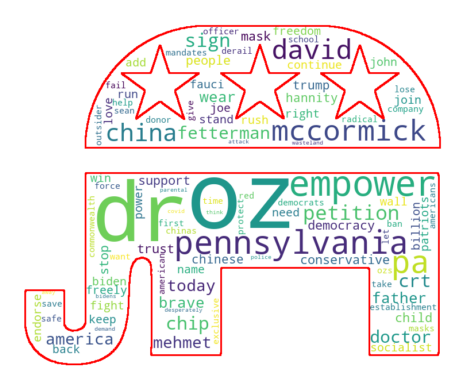

In [33]:
#test cloud republican
wordcloud(bow,'Dr. Mehmet Oz','R', True)

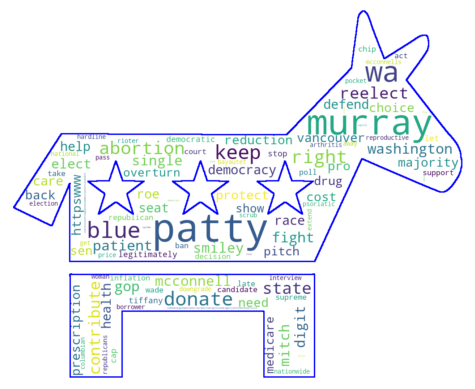

In [34]:
#test cloud democrat
wordcloud(bow,'Patty Murray','D', True)

## Create all wordclouds
### Democrats

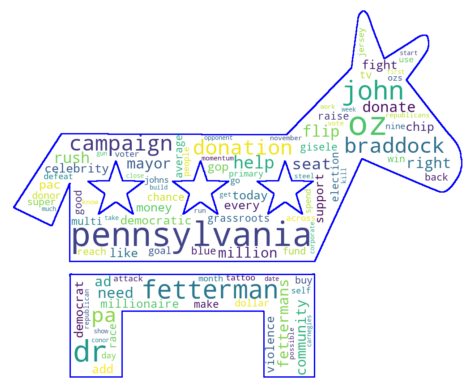

In [35]:
for c in dem_can:
    wordcloud(bow,c,'D', False)

### Republicans

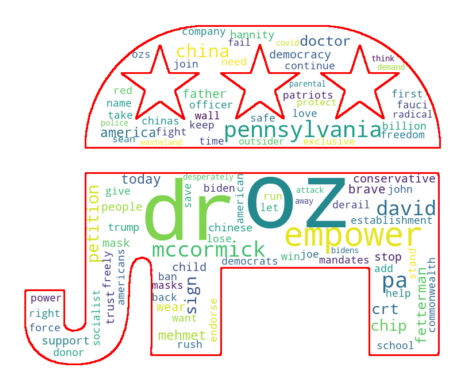

In [36]:
for c in rep_can:
    wordcloud(bow,c,'R', False)